In [27]:
from PIL import Image
import os
from tetra.model import inference
from tetra.utils import file_io, viewer
import sahi
import matplotlib.pyplot as plt

In [25]:
model_path = os.path.abspath("../../runs/train/lyrurus_yolov11m/weights/best.pt")
image_path = os.path.abspath("../../dataset_og/04160110_JPG.rf.54148cf7aa340b30973069c8001b8254.jpg")  
save_dir = os.path.abspath("../../outputs/labels")
class_file = os.path.abspath("../classes.txt")

In [21]:
res = inference.inference(model_path=model_path, image_path=image_path)
#Convert to yolo
yolo_labels = file_io.coco_to_yolo(res.to_coco_annotations(), image_path)
#Get image name
image_name = os.path.splitext(os.path.basename(image_path))[0] + ".txt"
#Save labels
file_io.save_yolo_labels(yolo_labels, save_dir, image_name)

Performing prediction on 20 slices.


['0', '0.770945', '0.372229', '0.010315', '0.020231']
['0', '0.491355', '0.423232', '0.015997', '0.021119']
['0', '0.802947', '0.394426', '0.018054', '0.019755']
['0', '0.038630', '0.929133', '0.030419', '0.041086']


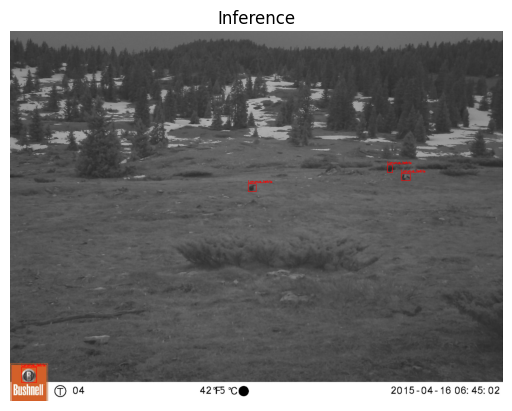

In [30]:
image = viewer.view_image(image_path, os.path.join(save_dir,image_name), class_file,None)
plt.imshow(image)
plt.title("Inference")
plt.axis("off")
plt.show()